## Sales Predictions for Bigmart Outlet

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()
train_file_path = r"D:\Manikandan\Documents\Datascience_ML_DL_AI\Programming\Github\ds23_future_datascience_legend_work\Practice\train_bigmartsalesprediction.csv"
test_file_path = r"D:\Manikandan\Documents\Datascience_ML_DL_AI\Programming\Github\ds23_future_datascience_legend_work\Practice\test_bigmartsalesprediction.csv"
submission_file_path = r"D:\Manikandan\Documents\Datascience_ML_DL_AI\Programming\Github\ds23_future_datascience_legend_work\Practice\sample_bigmartsalesprediction.csv"

In [3]:
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [6]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train.duplicated().sum()

0

In [11]:
train['Item_Fat_Content'].nunique()

5

In [12]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
columns_with_less_unique = ['Item_Fat_Content',
       'Item_Type','Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

In [15]:
for col in columns_with_less_unique:
    print(col, ' = ', train[col].nunique(), train[col].unique())

Item_Fat_Content  =  5 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type  =  16 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier  =  10 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year  =  9 [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Size  =  3 ['Medium' nan 'High' 'Small']
Outlet_Location_Type  =  3 ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type  =  4 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [16]:
train['Item_Weight'].mean()

12.857645184135976

In [17]:
train[train['Item_Weight'].isna()].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680


In [18]:
train[train['Item_Identifier'] == 'FDP10']['Item_Weight']

7        NaN
585     19.0
2623    19.0
3382    19.0
4585    19.0
6087    19.0
7883    19.0
Name: Item_Weight, dtype: float64

In [19]:
train[train['Item_Identifier'] == 'FDP10']['Item_Weight'].mean()

19.0

In [20]:
train[train['Item_Identifier'] == 'DRI11']['Item_Weight'].mean()

8.26

In [21]:
train.groupby('Item_Identifier').Item_Weight.mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [22]:
train['Item_Weight_new1'] = train.Item_Weight.mean()

In [23]:
train['Item_Weight_new2'] = train.groupby('Item_Identifier').Item_Weight.transform(lambda x:x.fillna(x.mean()))

In [24]:
train[['Item_Identifier', 'Item_Weight', 'Item_Weight_new1', 'Item_Weight_new2']].head(2)

,Item_Identifier,Item_Weight,Item_Weight_new1,Item_Weight_new2
0,FDA15,9.30,12.857645,9.30
1,DRC01,5.92,12.857645,5.92


In [25]:
train[train['Item_Weight'].isna()].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_new1,Item_Weight_new2
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,12.857645,19.00
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,12.857645,8.26


## EDA

In [26]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_new1',
       'Item_Weight_new2'],
      dtype='object')

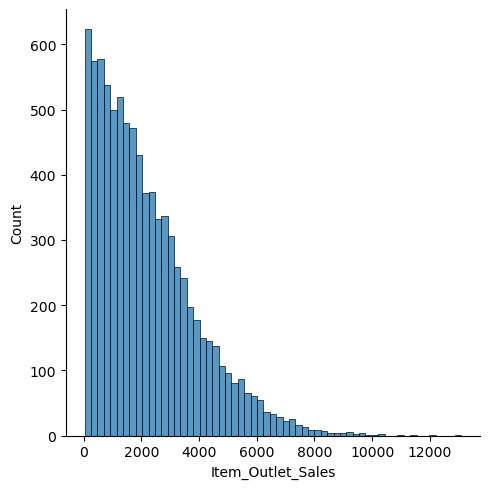

In [27]:
sns.displot(train['Item_Outlet_Sales'])

<Axes: >

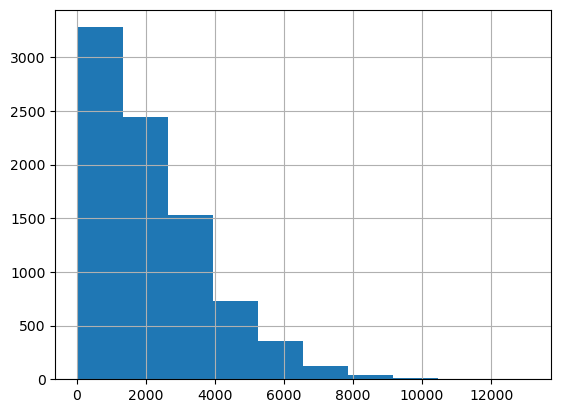

In [28]:
train['Item_Outlet_Sales'].hist()

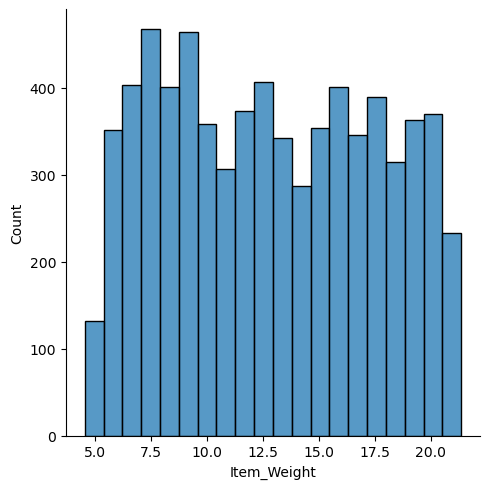

In [29]:
sns.displot(train['Item_Weight'])

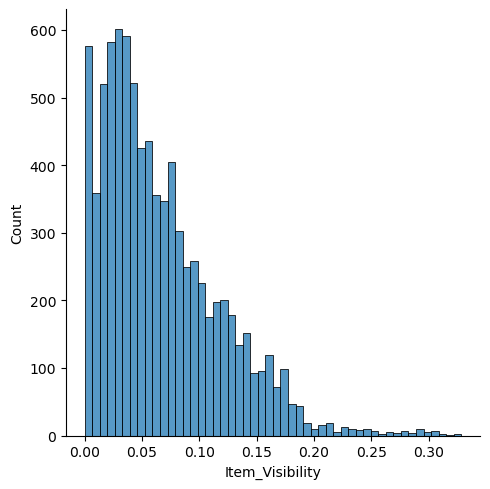

In [30]:
sns.displot(train['Item_Visibility'])

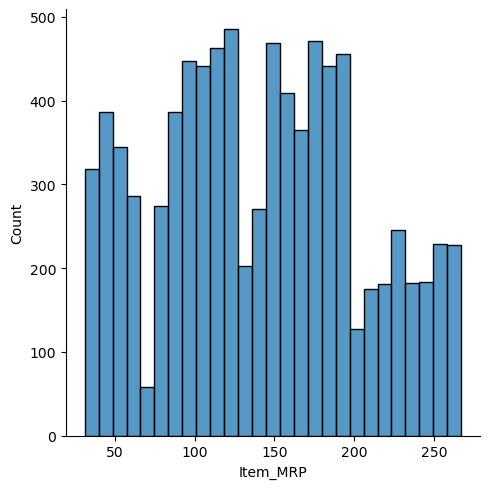

In [31]:
sns.displot(train['Item_MRP'])

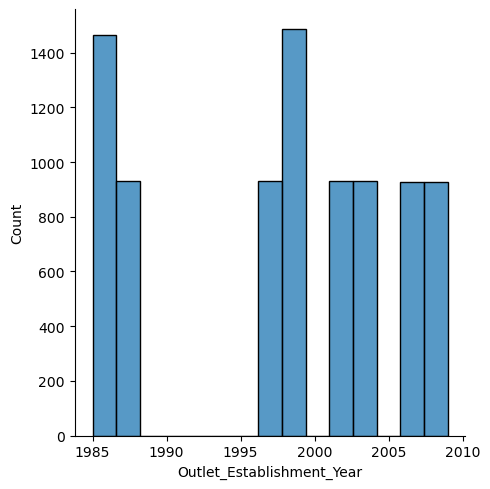

In [32]:
sns.displot(train['Outlet_Establishment_Year'])

In [33]:
train['Outlet_Establishment_Year'].value_counts().sort_index()

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: count, dtype: int64

In [34]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_new1',
       'Item_Weight_new2'],
      dtype='object')

In [35]:
numerical_columns = train.select_dtypes(include = np.number).columns

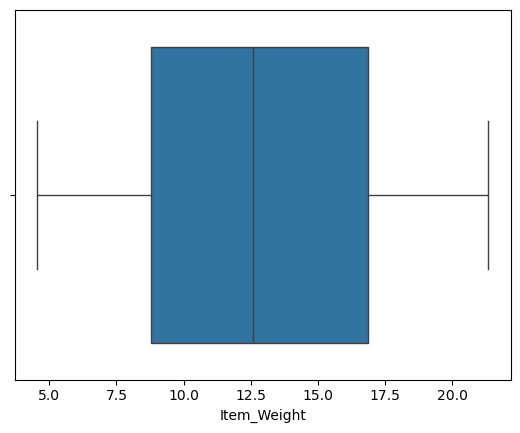

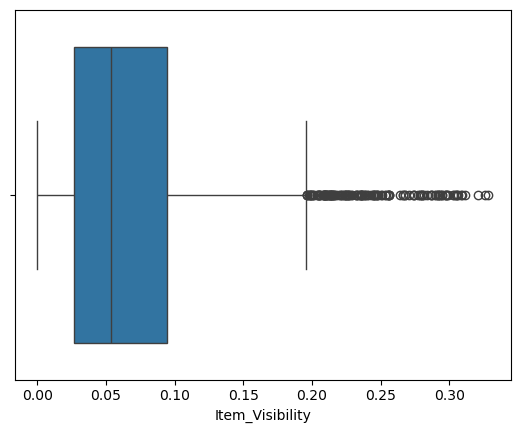

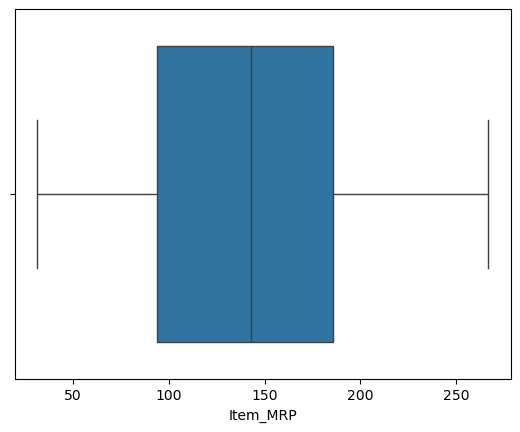

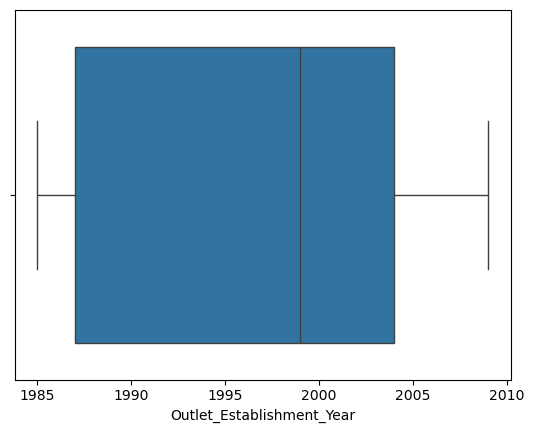

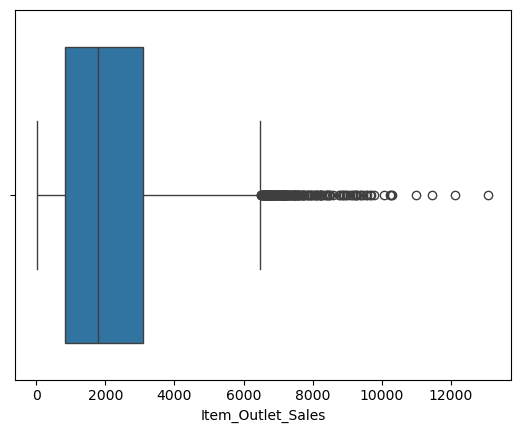

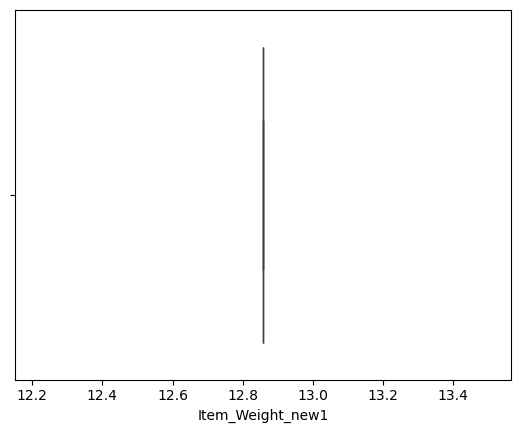

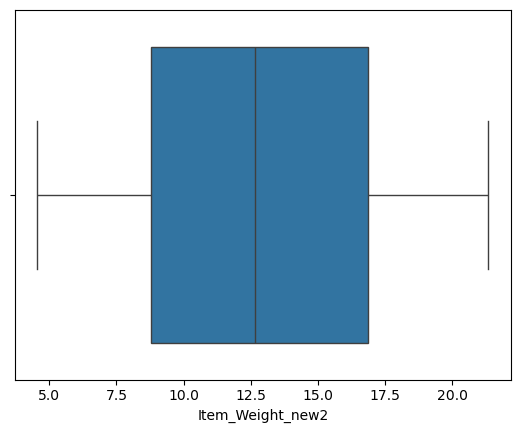

In [36]:
for col in numerical_columns:
    sns.boxplot(data = train, x=col)
    plt.show()

In [37]:
numerical_columns_out = train.select_dtypes(include=np.number).drop(columns=['Item_Outlet_Sales']).columns

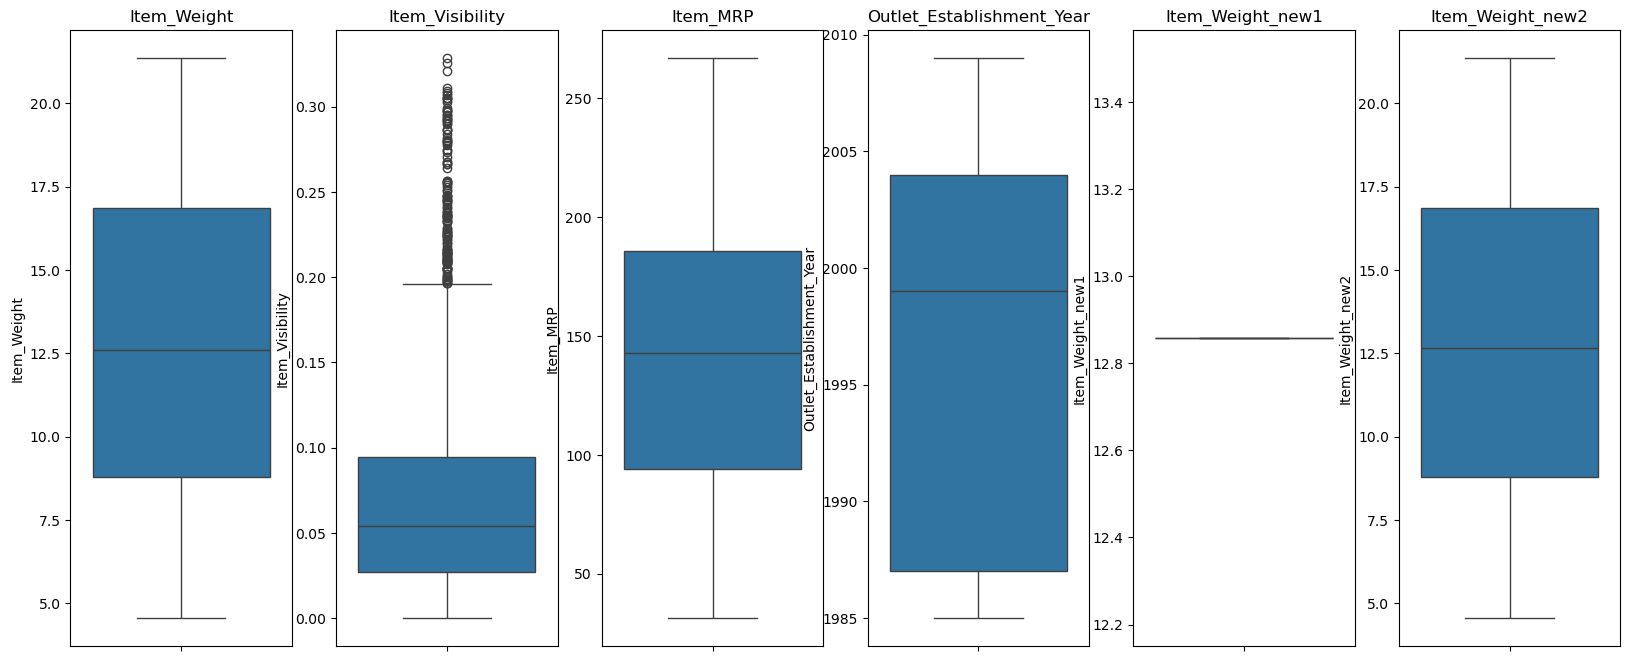

In [38]:
fig, ax  = plt.subplots(nrows=1, ncols=6, figsize=(20,8))
for i, col in enumerate(numerical_columns_out):
    sns.boxplot(data = train, y=col, ax=ax[i])
    ax[i].set_title(col)
plt.show()

In [39]:
category_columns = train.select_dtypes(exclude=np.number).columns

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

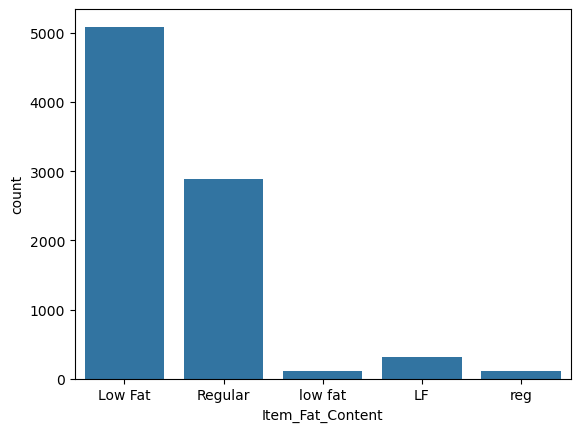

In [40]:
sns.countplot(data=train, x='Item_Fat_Content')

<Axes: xlabel='count', ylabel='Item_Type'>

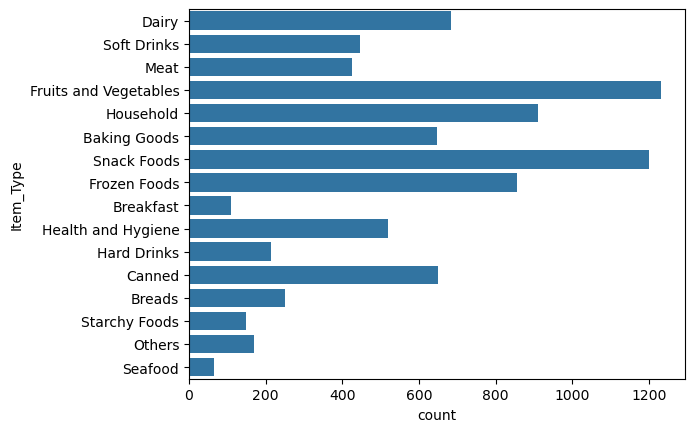

In [41]:
sns.countplot(data=train, y='Item_Type')

<Axes: ylabel='count'>

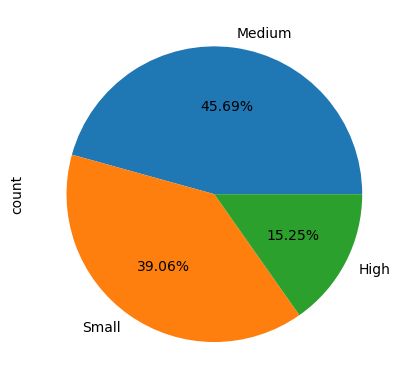

In [42]:
train['Outlet_Size'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [43]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

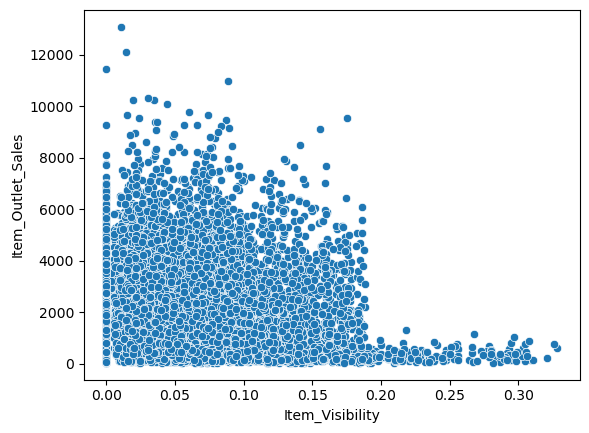

In [44]:
sns.scatterplot(data=train, x='Item_Visibility', y='Item_Outlet_Sales')

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

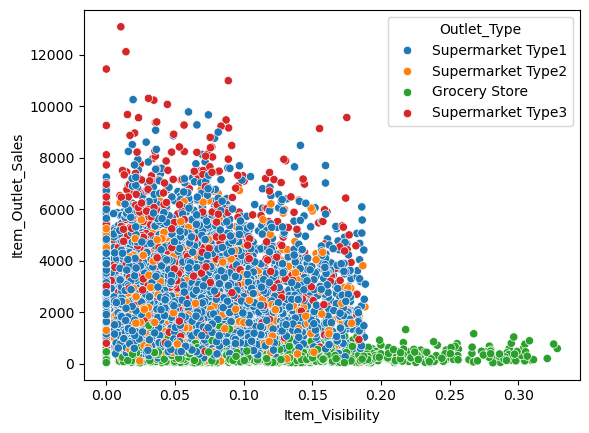

In [45]:
sns.scatterplot(data=train, x='Item_Visibility', y='Item_Outlet_Sales', hue='Outlet_Type')

In [46]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_new1',
       'Item_Weight_new2'],
      dtype='object')

<Axes: >

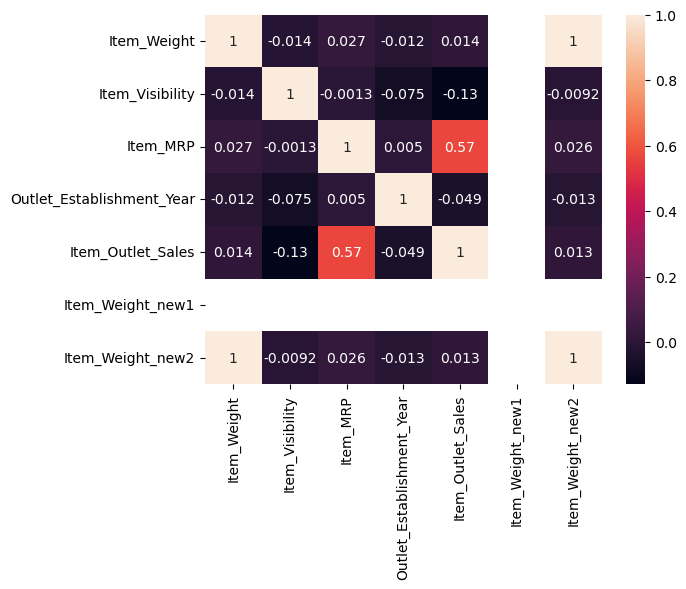

In [47]:
sns.heatmap(train[numerical_columns].corr(),annot=True)

In [48]:
train['age_of_outlet'] = 2024 - train['Outlet_Establishment_Year']

In [49]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_new1,Item_Weight_new2,age_of_outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,12.857645,9.30,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12.857645,5.92,15


In [50]:
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)
submission = pd.read_csv(submission_file_path)

In [51]:
submission.columns

Index(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], dtype='object')

In [52]:
mean_sales = train['Item_Outlet_Sales'].mean()

In [53]:
#define a dataframe for submission
base_model = test[['Item_Identifier', 'Outlet_Identifier']]
base_model['Item_Outlet_Sales'] = mean_sales

In [54]:
base_model.to_csv('submission_by_base_modelling.csv', index=False)

In [55]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [56]:
train['Item_Weight'].mean()

12.857645184135976

In [57]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [58]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [59]:
train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [60]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode().values[0],inplace=True)

In [61]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [62]:
train.duplicated().sum()

0

In [63]:
cat_cols = train.select_dtypes(include='object').drop(columns='Item_Identifier').columns
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [64]:
num_cols  = train.select_dtypes(exclude='object').drop(columns='Item_Outlet_Sales').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [65]:
train[cat_cols].head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2


In [66]:
train[num_cols].head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009


In [67]:
# convert category into columns
preprocess_category_train_columns = pd.get_dummies(train[cat_cols],dtype=int)
preprocess_category_train_columns.head(2)

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [68]:
preprocess_category_train_columns.columns

Index(['Item_Fat_Content_LF', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
     

In [69]:
train[cat_cols].nunique()

Item_Fat_Content         5
Item_Type               16
Outlet_Identifier       10
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [70]:
train[num_cols].head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009


In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
preprocess_numeric_train_columns = pd.DataFrame(scaler.fit_transform(train[num_cols]),columns=num_cols)
preprocess_numeric_train_columns.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.841872,-0.970732,1.747454,0.139541
1,-1.641706,-0.908111,-1.489023,1.334103


In [74]:
train_preprocessed = pd.concat([preprocess_category_train_columns, preprocess_numeric_train_columns, train['Item_Outlet_Sales']], axis=1)
train_preprocessed.head(2)

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-0.841872,-0.970732,1.747454,0.139541,3735.1380
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,-1.641706,-0.908111,-1.489023,1.334103,443.4228


In [75]:
X = train_preprocessed.drop(columns='Item_Outlet_Sales')
y = train_preprocessed[['Item_Outlet_Sales']]

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [78]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=36)
train.shape, train_X.shape, test_X.shape, train_y.shape, test_y.shape

((8523, 12), (6818, 45), (1705, 45), (6818, 1), (1705, 1))

In [79]:
model = LinearRegression()

In [80]:
model.fit(train_X, train_y)

LinearRegression()

In [81]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [83]:
def evaluate(actual, pred, source):
    print(source)
    print("MSE")
    print(mean_squared_error(actual, pred))
    print("RMSE")
    print(np.sqrt(mean_squared_error(actual, pred)))
    print("MAPE")
    print(mean_absolute_percentage_error(actual, pred)) 
    print("R2 score")
    print(r2_score(actual, pred)) 
    return [mean_squared_error(actual, pred), np.sqrt(mean_squared_error(actual, pred)), r2_score(actual, pred), mean_absolute_percentage_error(actual, pred)]

In [84]:
train_result = evaluate(train_y, train_pred, 'TRAIN DATA RESULT')
test_result = evaluate(test_y, test_pred, 'TEST DATA RESULT')

TRAIN DATA RESULT
MSE
1275782.7353942157
RMSE
1129.5055269427485
MAPE
1.0316877307162167
R2 score
0.5677677304695811
TEST DATA RESULT
MSE
1251914.4955893434
RMSE
1118.8898496229838
MAPE
1.087113616986829
R2 score
0.5438282448713505


In [85]:
res = [train_result] + [test_result]
res

[[1275782.7353942157,
  1129.5055269427485,
  0.5677677304695811,
  1.0316877307162167],
 [1251914.4955893434,
  1118.8898496229838,
  0.5438282448713505,
  1.087113616986829]]

In [86]:
pd.DataFrame(res, columns=['MSE','RMSE','MAPE','R2 score'], index = ['Train', 'Test'])

,MSE,RMSE,MAPE,R2 score
Train,1.275783e+06,1129.505527,0.567768,1.031688
Test,1.251914e+06,1118.889850,0.543828,1.087114


## Using Pipeline to fit and predict

In [87]:
train = pd.read_csv(train_file_path)

In [88]:
category_columns_to_encode = train.select_dtypes(include='object').drop(columns='Item_Identifier').columns
category_columns_to_encode

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [89]:
num_cols = train.select_dtypes(exclude='object').drop(columns='Item_Outlet_Sales').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [93]:
cat_pipe_encode = Pipeline(
    steps = [
        ('impute_cat', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder())
    ]
)

In [94]:
num_pipe_encode = Pipeline(
    steps = [
        ('impute_num', SimpleImputer(strategy='mean')),
        ('scale', StandardScaler())
    ]
)

In [97]:
preprocess = ColumnTransformer(
    transformers=[
        ('num_encode', num_pipe_encode, num_cols),
        ('cat_encode', cat_pipe_encode, category_columns_to_encode)
    ]
)

In [98]:
model_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocess),
        ('lin_reg', LinearRegression())
    ])

In [99]:
X = train.drop(columns='Item_Outlet_Sales')
y = train[['Item_Outlet_Sales']]

In [101]:
X.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [102]:
y.head(2)

,Item_Outlet_Sales
0,3735.1380
1,443.4228


In [103]:
train_X, train_y, test_X, test_y = train_test_split(X, y, test_size=0.2, random_state=36)
train.shape, train_X.shape, test_X.shape, train_y.shape, test_y.shape

((8523, 12), (6818, 11), (6818, 1), (1705, 11), (1705, 1))

In [104]:
model_pipeline.fit(train_X, train_y)

ValueError: Input contains NaN